In [1]:
from vega_datasets import data
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = data.sf_temps()

In [9]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Use the above dataset for the exercises below:

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [10]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [12]:
avg_day_temp = df.resample('D').mean()
avg_day_temp.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


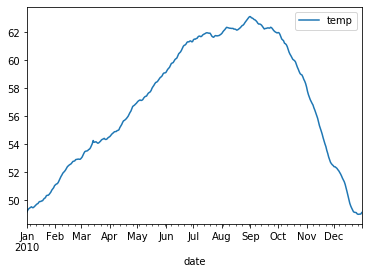

In [13]:
avg_day_temp.plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [15]:
min_month_temp = df.resample('M').min()
min_month_temp.head()

,temp
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4


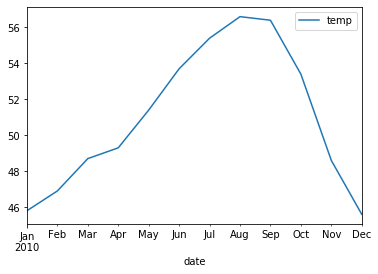

In [16]:
min_month_temp.plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

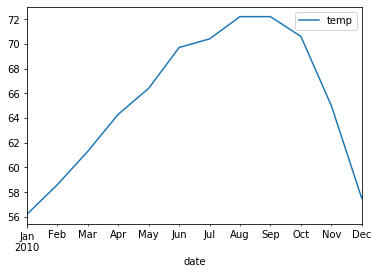

In [18]:
max_month_temp = df.resample('M').max()
max_month_temp.plot()

### 4. Which month is the coldest, on average?

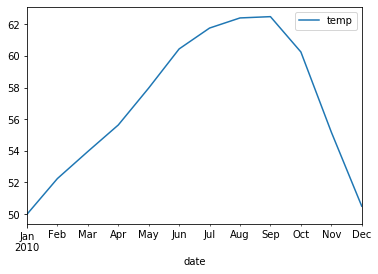

In [19]:
avg_month_temp = df.resample('M').mean()
avg_month_temp.plot()

In [25]:
avg_month_temp.sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


### 5. Which month has the highest average temperature?

In [26]:
avg_month_temp.sort_values(by='temp', ascending=False).head(1)

,temp
date,
2010-09-30,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [27]:
min_max_temp = df.resample('D').agg(['min', 'max'])
min_max_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [29]:
min_max_temp['temp_diff'] = min_max_temp.temp['max'] - min_max_temp.temp['min']
min_max_temp.head()

temp       temp_diff
             min   max          
date                            
2010-01-01  45.8  53.3       7.5
2010-01-02  46.0  53.4       7.4
2010-01-03  46.1  53.5       7.4
2010-01-04  46.1  53.6       7.5
2010-01-05  46.1  53.8       7.7

In [30]:
monthly_temp_diff = min_max_temp.drop(columns='temp')

In [38]:
monthly_temp_diff = monthly_temp_diff.resample('M').mean()
monthly_temp_diff.sort_values(by='temp_diff', ascending=False).head(1)

,temp_diff
,
date,
2010-09-30,14.403333


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

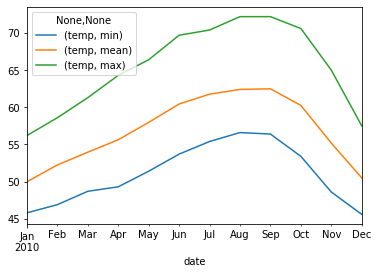

In [39]:
df.resample('M').agg(['min', 'mean', 'max']).plot()

### Use the dataset to answer the following questions:

In [41]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [47]:
df = df.set_index('date').sort_index()

### 1. Which year and month combination has the highest amount of precipitation?

In [49]:
monthly_avg_rain = pd.DataFrame(df['precipitation'].resample('M').mean())
monthly_avg_rain.head()

,precipitation
date,
2012-01-31,5.590323
2012-02-29,3.182759
2012-03-31,5.903226
2012-04-30,2.270000
2012-05-31,1.683871


In [51]:
monthly_avg_rain[monthly_avg_rain.precipitation == monthly_avg_rain.precipitation.max()]

,precipitation
date,
2015-12-31,9.177419


The highest combination of year and month precipitation was December 2015.

### 2. Visualize the amount of monthly precipitation over time.

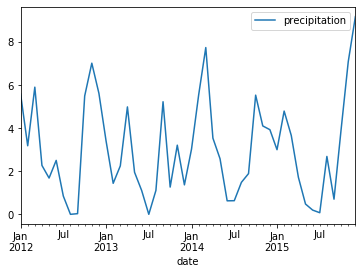

In [52]:
monthly_avg_rain.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [57]:
weekly_avg_wind = pd.DataFrame(df['wind'].resample('7D').mean())
weekly_avg_wind.head()

,wind
date,
2012-01-01,3.828571
2012-01-08,3.200000
2012-01-15,4.414286
2012-01-22,3.900000
2012-01-29,4.057143


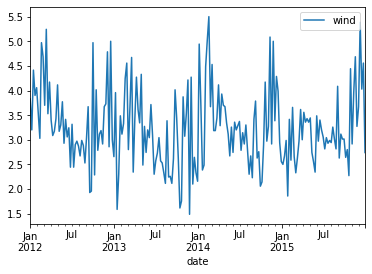

In [58]:
weekly_avg_wind.plot()

### 4. Which year-month combination is the windiest?

In [59]:
monthly_avg_wind = pd.DataFrame(df['wind'].resample('M').mean())
monthly_avg_wind[monthly_avg_wind.wind == monthly_avg_wind.wind.max()]

,wind
date,
2014-02-28,4.528571


February 2014 was the windiest month year combination.

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [60]:
sunny_days = df[df.weather=='sun']
sunny_days = pd.DataFrame(sunny_days['weather'])
sunny_days.resample('Y').count()

,weather
date,
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


The sunniest year was 2014 with 211 sunny days.

### 6. In which month does it rain the most?

In [62]:
rainy_days = df[df.weather=='rain']
rainy_days = pd.DataFrame(rainy_days['weather'])
rainy_days['month'] = rainy_days.index.month
rainy_months = rainy_days.groupby(['month']).count()
rainy_months[rainy_months.weather == rainy_months.weather.max()]

,weather
month,
2,40


The rainiest month is february.

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [64]:
any_rain = df[df.precipitation > 0]
any_rain = pd.DataFrame(any_rain['precipitation'])
any_rain['month'] = any_rain.index.month
monthly_rain = any_rain.groupby(['month']).count()
monthly_rain[monthly_rain.precipitation == monthly_rain.precipitation.max()]

,precipitation
month,
12,81


It seems december has the most days with any amount of rain.

### Flights Dataset

In [66]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [68]:
df = df.set_index('date').sort_index()

In [69]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Convert any negative delays to 0.

In [71]:
df.loc[(df.delay < 0), 'delay'] = 0

In [73]:
df.describe()

,delay,distance
count,20000.000000,20000.000000
mean,11.119450,505.262400
std,23.527015,356.950889
min,0.000000,108.000000
25%,0.000000,284.000000
50%,0.000000,370.000000
75%,12.000000,611.000000
max,509.000000,2298.000000


### Which hour of the day has the highest average delay?

In [74]:
avg_delay = pd.DataFrame(df['delay'])
avg_delay['hour'] = avg_delay.index.hour
avg_delay = avg_delay.groupby(['hour']).mean()
avg_delay[avg_delay.delay == avg_delay.delay.max()]

,delay
hour,
3,302.5


3 AM has the highest average delay.

### Does the day of the week make a difference in the delay amount?

In [76]:
weekday_delay = pd.DataFrame(df['delay'])
weekday_delay['day'] = weekday_delay.index.weekday
weekday_delay = weekday_delay.groupby(['day']).mean()
weekday_delay

,delay
day,
0,7.165772
1,9.410866
2,11.032478
3,12.821322
4,17.757596
5,8.431498
6,10.413542


It seems that the day of the week does actually make a difference in average delay.

### Does the month make a difference in the delay amount?

In [77]:
monthly_delay = pd.DataFrame(df['delay'])
monthly_delay['month'] = monthly_delay.index.month
monthly_delay = monthly_delay.groupby(['month']).mean()
monthly_delay

,delay
month,
1,11.301592
2,12.306106
3,9.875287


Which month it is makes a small difference in average delay.